# Código do Modelo Estatístico

## Libraries

In [1]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
from scipy.interpolate import UnivariateSpline


## Functions

In [2]:
def quantile_metalog(y,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10):
    quantiles =  a1 + \
        a2*np.log(y/(1-y)) + \
        a3*(y-0.5)*np.log(y/(1-y)) + \
        a4*(y-0.5) + \
        a5*(y-0.5)**(2) + \
        a6*((y-0.5)**2)*np.log(y/(1-y)) + \
        a7*((y-0.5)**3) + \
        a8*((y-0.5)**3)*np.log(y/(1-y)) + \
        a9*((y-0.5)**4) + \
        a10*((y-0.5)**4)*np.log(y/(1-y))
    # Clip quantiles to ensure they don't go below 0
    #return quantiles
    return np.clip(quantiles, 0, None)
   

# Probability Density
def pdf_metalog(y,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10):
    term_1 = y*(1-y)/a2
    term_2_1 = 1/term_1
    term_2_2 = a3*((y-0.5)/(y*(1-y)) + np.log(y/(1-y)))
    term_2 = 1/(term_2_1 + term_2_2)
    term_3_1 = 1/(term_2) + a4
    term_3 = 1/term_3_1
    term_4_1 = 1/term_3
    term_4_2 = 2*a5*(y-0.5)
    term_4 = 1/(term_4_1+term_4_2)
    term_5_1 = 1/(term_4)
    term_5_2a = ((y-0.5)**2)/(y*(1-y))
    term_5_2b = 2*(y-0.5)*np.log(y/(1-y))
    term_5_2 = a6*(term_5_2a + term_5_2b)
    term_5 = 1/(term_5_1 + term_5_2)
    term_6_1 = 1/term_5
    term_6_2 = 3*a7*(y-0.5)**2
    term_6 = 1/(term_6_1 + term_6_2)
    term_7_1 = 1/term_6
    term_7_2a = ((y-0.5)**3)/(y*(1-y))
    term_7_2b = (3*(y-0.5)**2)*np.log(y/(1-y))
    term_7_2 = a8*(term_7_2a + term_7_2b)
    term_7 = 1/(term_7_1+term_7_2)
    term_8_1 = 1/term_7
    term_8_2 = 4*a9*(y-0.5)**3
    term_8 = 1/(term_8_1+term_8_2)
    term_9_1 = 1/term_8
    term_9_2a = ((y-0.5)**4)/(y*(1-y))
    term_9_2b = (4*(y-0.5)**3)*np.log(y/(1-y))
    term_9_2 = a10*(term_9_2a+term_9_2b)
    term_9 = 1/(term_9_1 + term_9_2)
    #return term_9
    return np.clip(term_9, 0, None)

## Treatment of Source's Data


In [4]:
"""
Superior Limites of Income separated by percentils (P10, P20, P30, P40, P50, P60, P70, P80, P90, P95, P99)
"""
array_2012 = np.log(np.array([1.01,147,229,311,403,507,630,797,1074,1704,2688,6384]))
array_2013 = np.log(np.array([1.01,167,257,347,452,569,694,879,1187,1907,2990,7021]))
array_2014 = np.log(np.array([1.01,188,292,387,500,634,756,976,1300,2051,3236,7468]))
array_2015 = np.log(np.array([1.01,198,306,411,529,672,814,1029,1380,2177,3353,7758]))
array_2016 = np.log(np.array([1.01,197,307,433,552,696,875,1082,1479,2382,3714,8658]))
array_2017 = np.log(np.array([1.01,199,316,451,578,730,933,1130,1511,2453,3821,9049]))
array_2018 = np.log(np.array([1.01,201,334,473,610,773,967,1211,1641,2625,4067,9893]))
array_2019 = np.log(np.array([1.01,211,348,498,650,826,1002,1282,1733,2723,4209,10365]))
array_2020 = np.log(np.array([1.01,252,396,527,673,836,1035,1263,1682,2646,4082,9832]))
array_2021 = np.log(np.array([1.01,203,356,496,636,813,1053,1273,1729,2742,4297,10311]))
array_2022 = np.log(np.array([1.01,298,461,612,798,997,1211,1506,2022,3207,4948,10853]))

"""
Creating the matrix
"""
arrays = [globals()['array_' + str(year)] for year in range(2012, 2023)]
matrix_income = np.vstack(arrays)

"""
Calculating the medians
"""

# Initialize an empty list to store the results for each row
#results_2d = []

# Calculate medians and insert them between each pair of subsequent values
#for row in matrix_income:
#    result = []
#    
#    for i in range(len(row) - 1):
#        result.append(row[i])
#        median = (row[i] + row[i + 1]) / 2
#        result.append(median)
#
#    # Add the last value from the current row and delete the first element
#    result.append(row[-1])
#    #result.pop(0)
#    
#    #Append the results for the current row to the 2D results list
#    results_2d.append(result)

#Convert the 2D results list to a NumPy array
matrix_income = np.array(matrix_income)
print(matrix_income)

[[0.00995033 4.99043259 5.433722   5.73979291 5.99893656 6.228511
  6.44571982 6.68085468 6.97914528 7.44073371 7.8965527  8.76155014]
 [0.00995033 5.11799381 5.54907608 5.84932478 6.11368218 6.34388043
  6.54247196 6.7787849  7.07918439 7.55328661 8.00302867 8.85666094]
 [0.00995033 5.23644196 5.6767538  5.95842469 6.2146081  6.45204895
  6.62804138 6.88346259 7.17011954 7.62608276 8.08209328 8.9183825 ]
 [0.00995033 5.28826703 5.7235851  6.01859321 6.27098843 6.51025834
  6.70196037 6.93634274 7.22983878 7.68570306 8.11761075 8.95647985]
 [0.00995033 5.28320373 5.72684775 6.07073773 6.31354805 6.54534966
  6.77422389 6.98656646 7.29912146 7.77569575 8.21986474 9.06623903]
 [0.00995033 5.29330482 5.75574221 6.11146734 6.35957387 6.59304453
  6.8384052  7.02997291 7.32052696 7.80506704 8.24826745 9.11040953]
 [0.00995033 5.30330491 5.81114099 6.15909539 6.41345896 6.65027905
  6.8741985  7.09920174 7.40306109 7.87283618 8.31066091 9.19958272]
 [0.00995033 5.35185813 5.85220248 6.210600

## Fitting

In [5]:
#y = [0.0001,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.925,0.95,0.97,0.99]
y = [0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95,0.99]
# Initialize an empty list to store the fitted parameters for each year
params_list = []
for year_data in matrix_income:
    # Fit the parameters for the quantile function using curve_fit
    popt, _ = curve_fit(quantile_metalog, y, year_data, maxfev=1000000)
    
    # Append the fitted parameters to the params_list
    params_list.append(popt)
    
# Convert the list of parameters to a NumPy array
params_matrix = np.array(params_list)
print(params_matrix)

[[ 6.22761913e+00  3.84855406e+00 -1.41667847e+01 -1.32307515e+01
   5.61726656e+01 -2.45485381e+00 -5.15300612e+00  3.92792365e+01
  -8.09335391e+01 -1.32542123e+01]
 [ 6.34028120e+00  2.36770821e-01 -1.18624838e+01  1.13203662e+00
   4.64432794e+01  1.47644055e+01 -5.32450824e+01  3.08921494e+01
  -5.28895854e+01 -2.73481024e+01]
 [ 6.44061012e+00 -1.00254812e+01 -8.59118128e+00  4.21287616e+01
   3.32863419e+01  6.14638134e+01 -1.84080211e+02  1.95942216e+01
  -2.11176505e+01 -6.14423847e+01]
 [ 6.50208494e+00  5.44792424e-01 -1.14747210e+01 -9.65968458e-02
   4.48832830e+01  1.34803537e+01 -5.04583005e+01  2.91868530e+01
  -4.74864035e+01 -2.61198366e+01]
 [ 6.54427244e+00  2.15436589e+01 -2.26219724e+01 -8.40064891e+01
   9.04781206e+01 -8.16019062e+01  2.15379053e+02  6.72604619e+01
  -1.58823390e+02  4.29859851e+01]
 [ 6.59653308e+00  3.40113393e+01 -2.62719553e+01 -1.33756068e+02
   1.05039738e+02 -1.39624246e+02  3.76955868e+02  7.97074858e+01
  -1.94160004e+02  8.87199786e+01

## Plot the Quantile curves

### all curves together

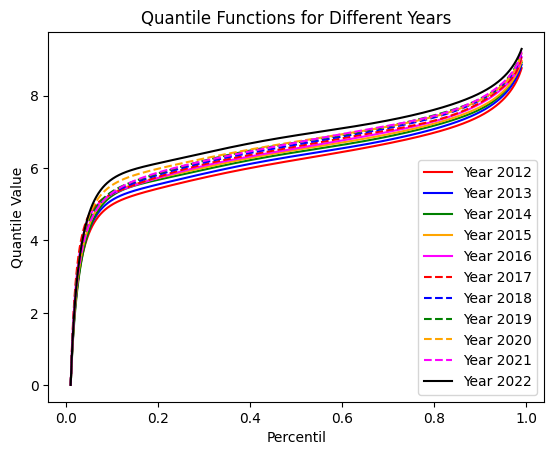

In [6]:
# Define the y values with 1000 points between 0.01 and 0.99
y_values = np.linspace(0.01, 0.99, 1000)

#colors
cores = ['red', 'blue', 'green', 'orange', 'magenta','red', 'blue', 'green', 'orange', 'magenta']


# Create a figure and axis
fig, ax = plt.subplots()

# Plot the quantile functions for each row in params_matrix
for i in range(params_matrix.shape[0]):
    params = params_matrix[i, :]
    quantiles = quantile_metalog(y_values, *params)
    if i < 5:
        ax.plot(y_values, quantiles, color=cores[i], label=f'Year {i + 2012}')
    elif i < 10:
        ax.plot(y_values, quantiles, color=cores[i], linestyle='--', label=f'Year {i + 2012}')
    else:
        ax.plot(y_values, quantiles, color='black', label=f'Year {i + 2012}')
# Add labels and legend
ax.set_xlabel('Percentil')
ax.set_ylabel('Quantile Value')
ax.set_title('Quantile Functions for Different Years')
ax.legend()

# Show the plot
plt.show()

### separated curves

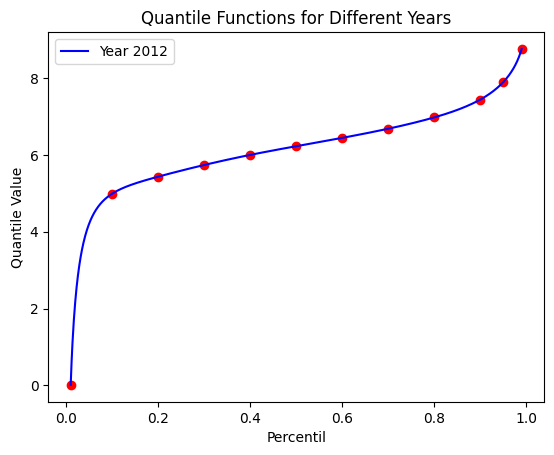

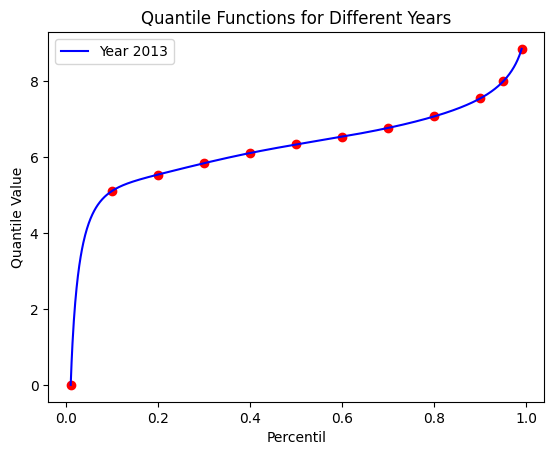

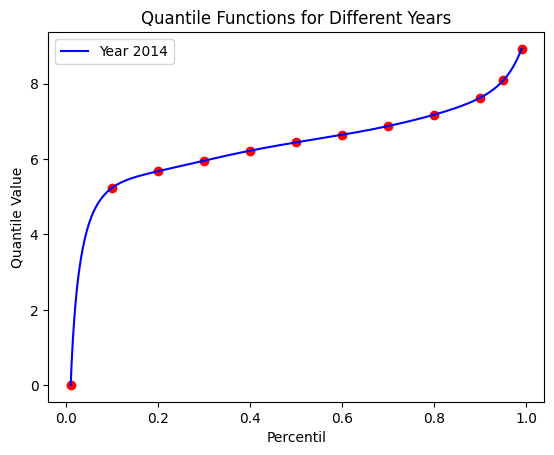

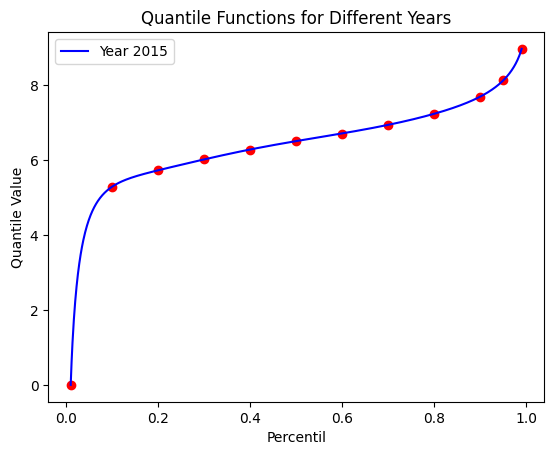

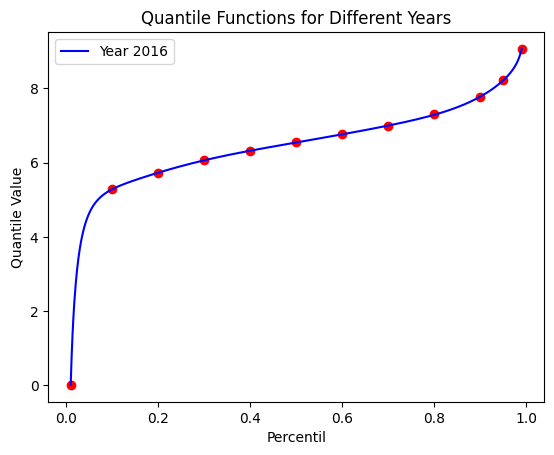

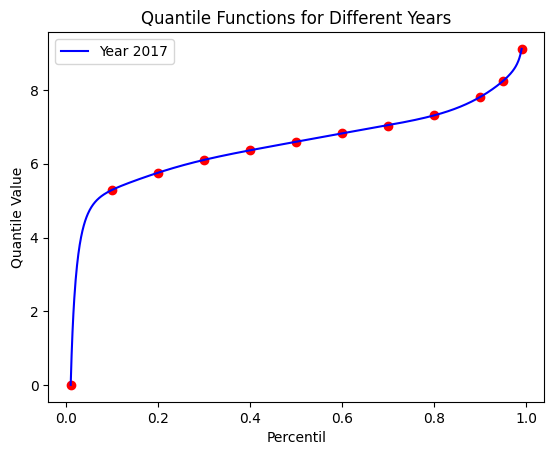

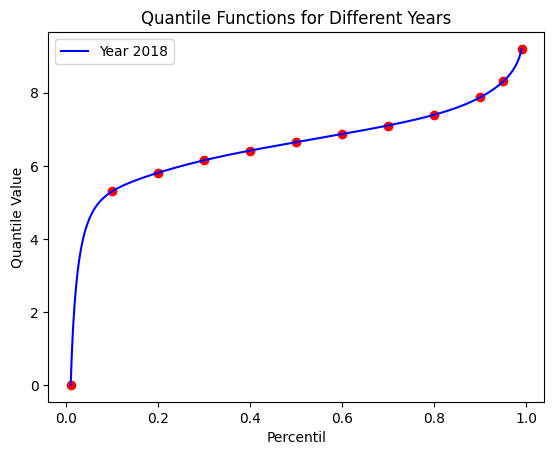

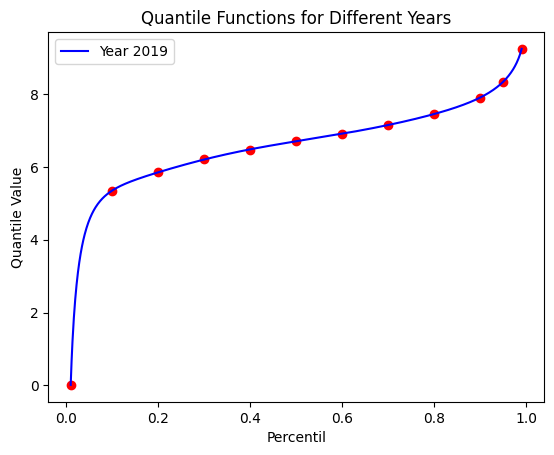

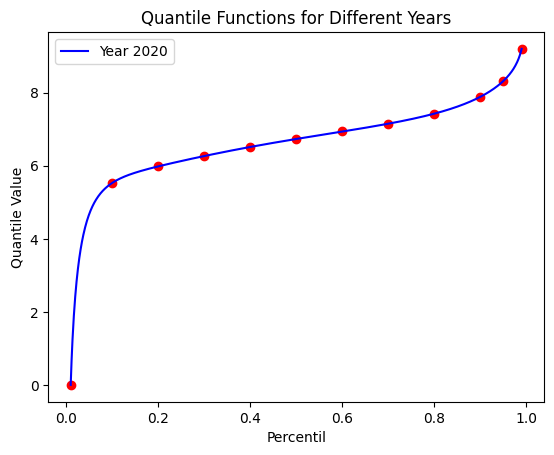

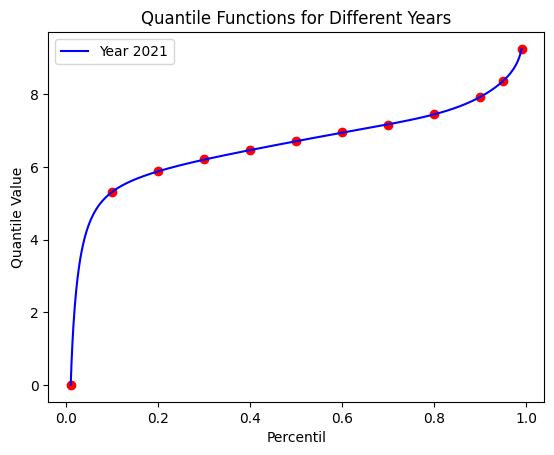

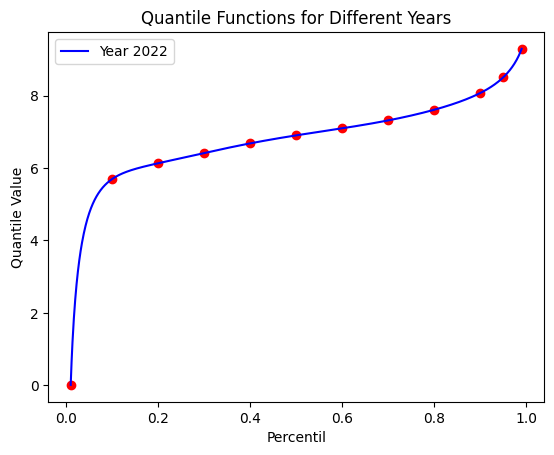

In [7]:
# Define the y values with 1000 points between 0.01 and 0.99
y_values = np.linspace(0.01, 0.99, 1000)

# Plot the quantile functions for each row in params_matrix
for i in range(params_matrix.shape[0]):
    params = params_matrix[i, :]
    quantiles = quantile_metalog(y_values, *params)

    plt.plot(y_values, quantiles, color='blue', label=f'Year {i + 2012}')
    plt.scatter(y, matrix_income[i], color='red')

    # Add labels and legend
    plt.xlabel('Percentil')
    plt.ylabel('Quantile Value')
    plt.title('Quantile Functions for Different Years')
    plt.legend()

    # Show the plot
    plt.show()

## Plot the PDF curves

### all curves together

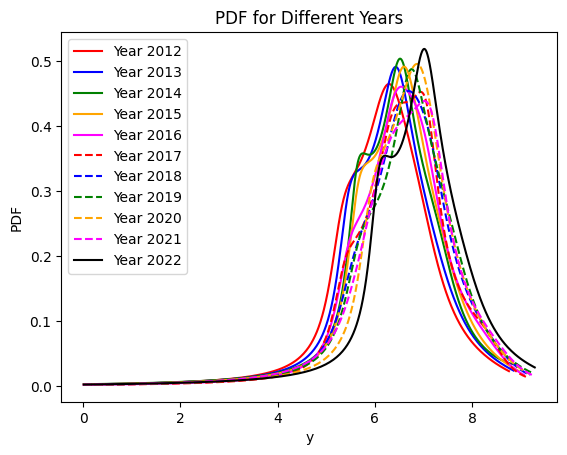

In [8]:
# Define the y values with 1000 points between 0.01 and 0.99
y_values = np.linspace(0.01, 0.99, 1000)

#colors
cores = ['red', 'blue', 'green', 'orange', 'magenta','red', 'blue', 'green', 'orange', 'magenta']


# Create a figure and axis
fig, ax = plt.subplots()

# Plot the quantile functions for each row in params_matrix
for i in range(params_matrix.shape[0]):
    params = params_matrix[i, :]
    quantiles = quantile_metalog(y_values, *params)
    
    #params = np.delete(params,0)
    pdfs = pdf_metalog(y_values, *params)

    # Your existing code here
    if i < 5:
        ax.plot(quantiles, pdfs, label=f'Year {i + 2012}', color=cores[i])
    elif i < 10:
        ax.plot(quantiles, pdfs, label=f'Year {i + 2012}', color=cores[i], linestyle='--')
    else:
        ax.plot(quantiles, pdfs, label=f'Year {i + 2012}', color='black')
# Add labels and legend
ax.set_xlabel('y')
#ax.set_ylim(0, 0.6)
ax.set_ylabel('PDF')
ax.set_title('PDF for Different Years')
ax.legend()

# Show the plot
plt.show()



### Separated curves

#### 2012, 2013 and 2014

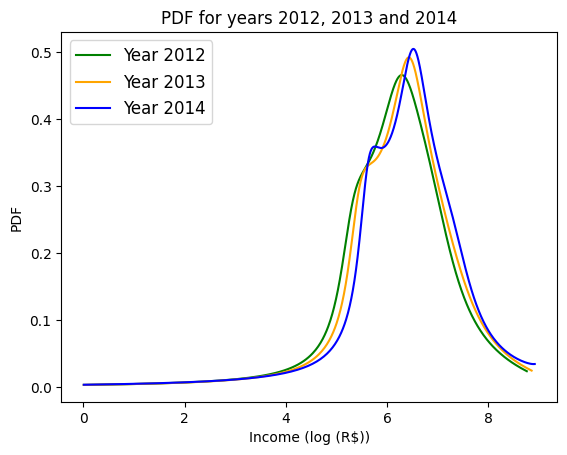

In [9]:
# Define the y values with 1000 points between 0.01 and 0.99
y_values = np.linspace(0.01, 0.99, 1000)

# Plot the quantile functions for each row in params_matrix
#for i in range(params_matrix.shape[0]):
# 2012-2013-2014
params = params_matrix[0, :]
quantiles_2012 = quantile_metalog(y_values, *params)
pdfs_2012 = pdf_metalog(y_values, *params)

params = params_matrix[1, :]
quantiles_2013 = quantile_metalog(y_values, *params)
pdfs_2013 = pdf_metalog(y_values, *params)

params = params_matrix[2, :]
quantiles_2014 = quantile_metalog(y_values, *params)
pdfs_2014 = pdf_metalog(y_values, *params)


plt.plot(quantiles_2012, pdfs_2012, label=f'Year {2012}', c = 'green')
plt.plot(quantiles_2013, pdfs_2013, label=f'Year {2013}', c = 'orange')
plt.plot(quantiles_2014, pdfs_2014, label=f'Year {2014}', c = 'blue')
plt.xlabel('Income (log (R$))')
plt.ylabel('PDF')
plt.title('PDF for years 2012, 2013 and 2014')

# Move the legend to the left side
plt.legend(loc='upper left')

# Increase the font size of the legend
plt.legend(fontsize='large')
plt.show()


#### 2015, 2016, 2017 and 2018

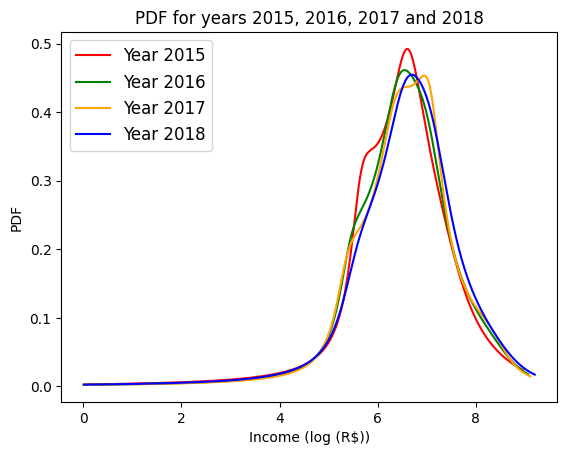

In [10]:
# Define the y values with 1000 points between 0.01 and 0.99
y_values = np.linspace(0.01, 0.99, 1000)

# Plot the quantile functions for each row in params_matrix
#for i in range(params_matrix.shape[0]):
# 2012-2013-2014
params = params_matrix[3, :]
quantiles_2015 = quantile_metalog(y_values, *params)
pdfs_2015 = pdf_metalog(y_values, *params)

params = params_matrix[4, :]
quantiles_2016 = quantile_metalog(y_values, *params)
pdfs_2016 = pdf_metalog(y_values, *params)

params = params_matrix[5, :]
quantiles_2017 = quantile_metalog(y_values, *params)
pdfs_2017 = pdf_metalog(y_values, *params)

params = params_matrix[6, :]
quantiles_2018 = quantile_metalog(y_values, *params)
pdfs_2018 = pdf_metalog(y_values, *params)


plt.plot(quantiles_2015, pdfs_2015, label=f'Year {2015}', c = 'red')
plt.plot(quantiles_2016, pdfs_2016, label=f'Year {2016}', c = 'green')
plt.plot(quantiles_2017, pdfs_2017, label=f'Year {2017}', c = 'orange')
plt.plot(quantiles_2018, pdfs_2018, label=f'Year {2018}', c = 'blue')
plt.xlabel('Income (log (R$))')
plt.ylabel('PDF')
plt.title('PDF for years 2015, 2016, 2017 and 2018')
# Move the legend to the left side
plt.legend(loc='upper left')

# Increase the font size of the legend
plt.legend(fontsize='large')
plt.show()
plt.show()


#### 2019, 2020, 2021 e 2022

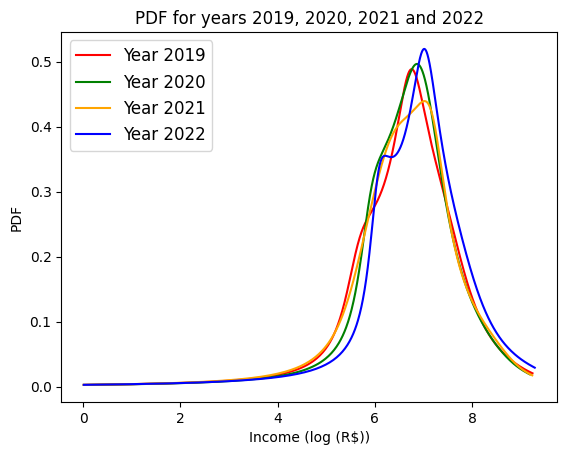

In [11]:
# Define the y values with 1000 points between 0.01 and 0.99
y_values = np.linspace(0.01, 0.99, 1000)

# Plot the quantile functions for each row in params_matrix
#for i in range(params_matrix.shape[0]):
# 2012-2013-2014
params = params_matrix[7, :]
quantiles_2019 = quantile_metalog(y_values, *params)
pdfs_2019 = pdf_metalog(y_values, *params)

params = params_matrix[8, :]
quantiles_2020 = quantile_metalog(y_values, *params)
pdfs_2020 = pdf_metalog(y_values, *params)

params = params_matrix[9, :]
quantiles_2021 = quantile_metalog(y_values, *params)
pdfs_2021 = pdf_metalog(y_values, *params)

params = params_matrix[10, :]
quantiles_2022 = quantile_metalog(y_values, *params)
pdfs_2022 = pdf_metalog(y_values, *params)


plt.plot(quantiles_2019, pdfs_2019, label=f'Year {2019}', c = 'red')
plt.plot(quantiles_2020, pdfs_2020, label=f'Year {2020}', c = 'green')
plt.plot(quantiles_2021, pdfs_2021, label=f'Year {2021}', c = 'orange')
plt.plot(quantiles_2022, pdfs_2022, label=f'Year {2022}', c = 'blue')
plt.xlabel('Income (log (R$))')
plt.ylabel('PDF')
plt.title('PDF for years 2019, 2020, 2021 and 2022')
# Move the legend to the left side
plt.legend(loc='upper left')

# Increase the font size of the legend
plt.legend(fontsize='large')
plt.show()
plt.show()


## Plot the 2nd derivative curves

### Teste

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


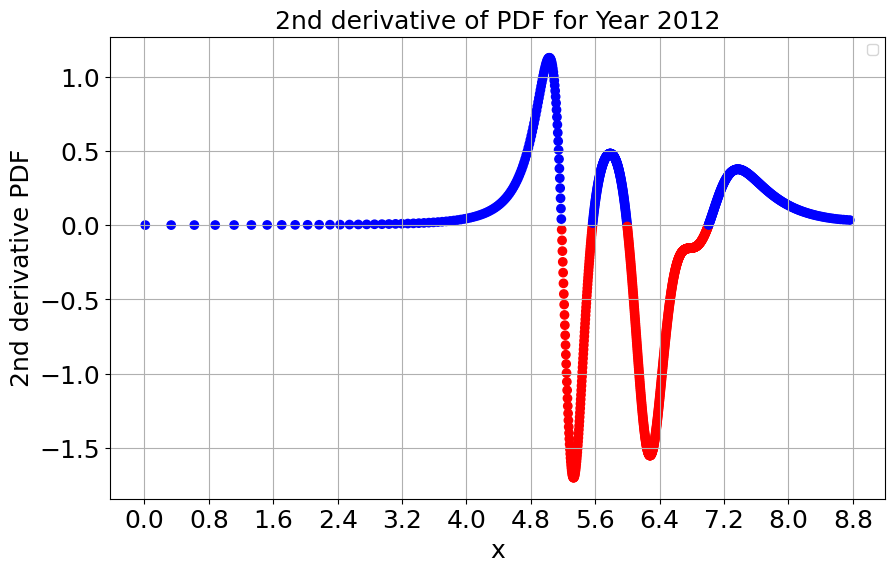

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


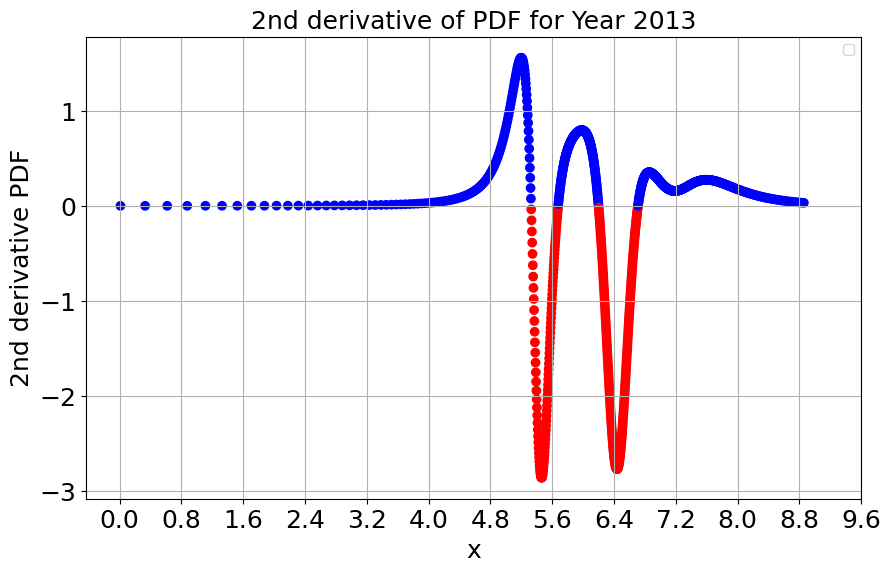

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


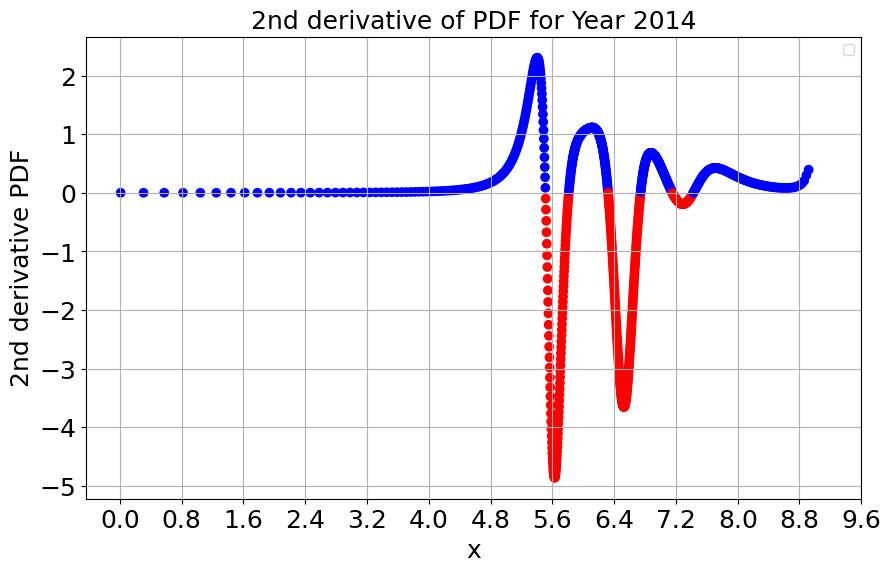

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


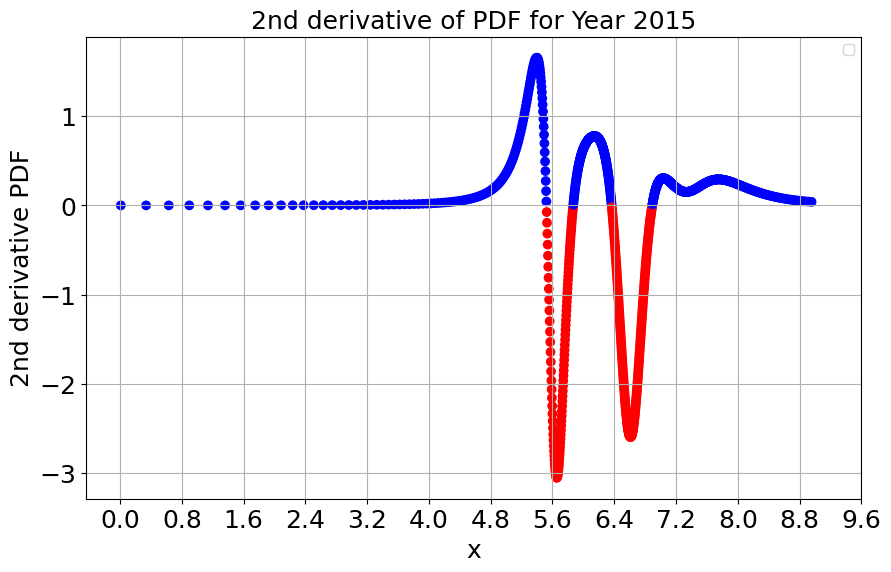

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


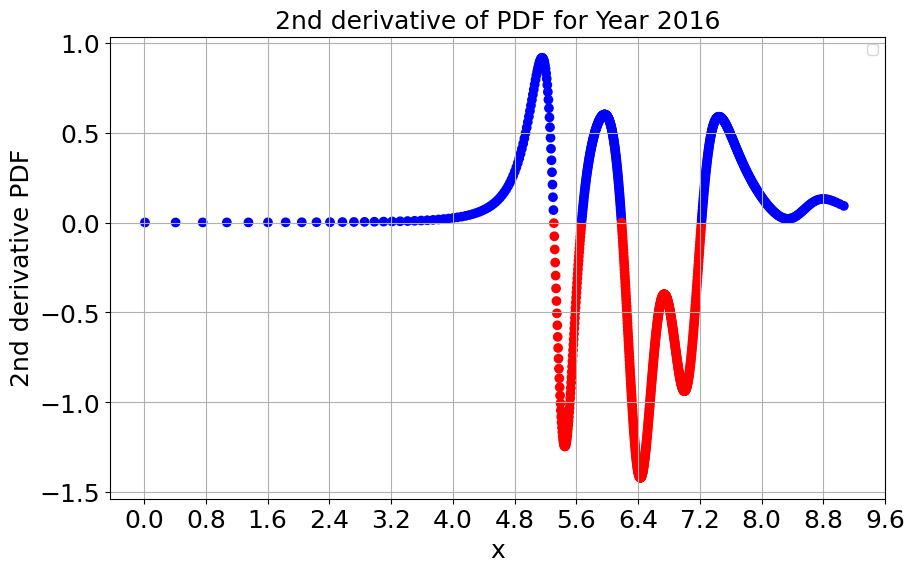

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


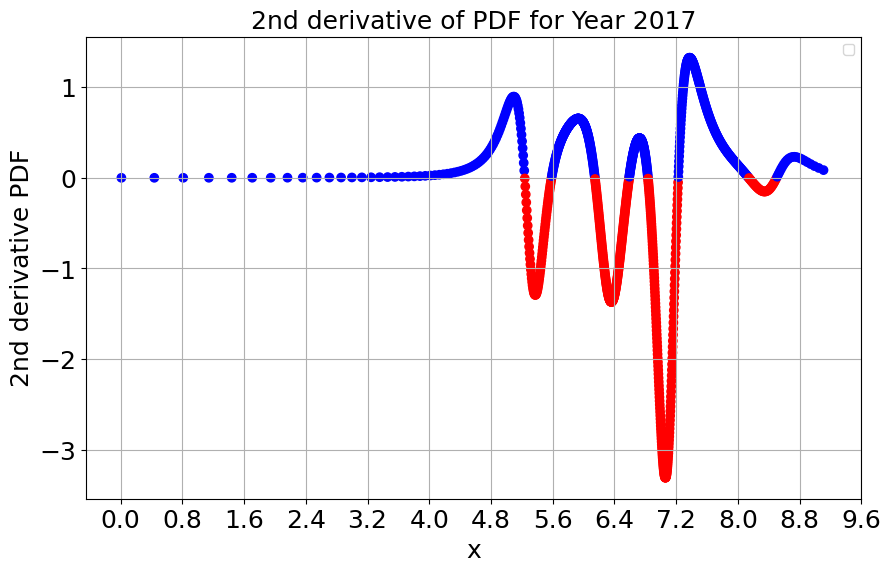

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


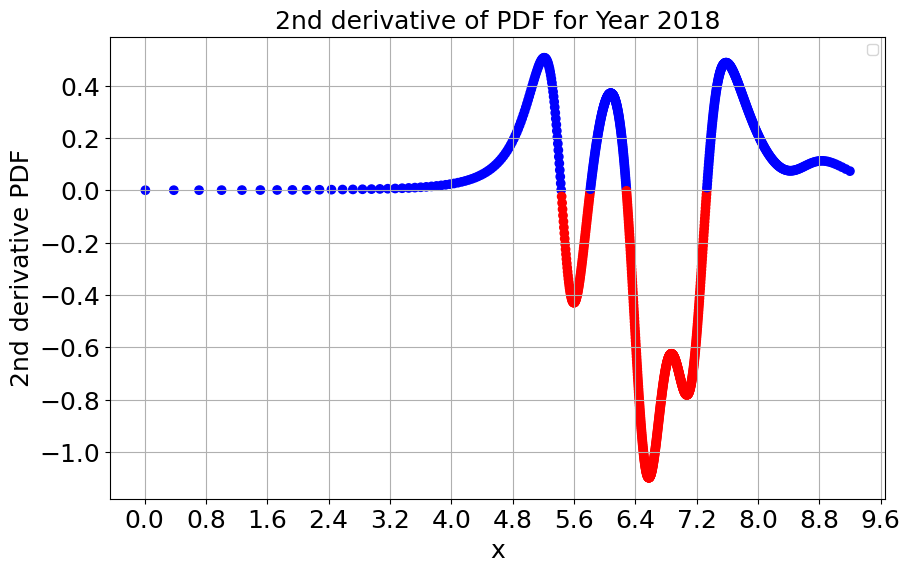

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


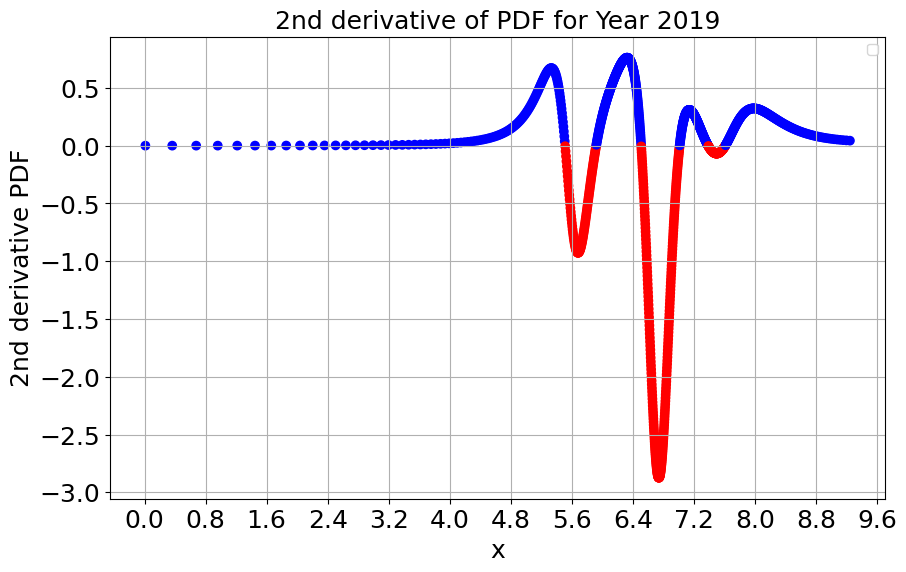

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


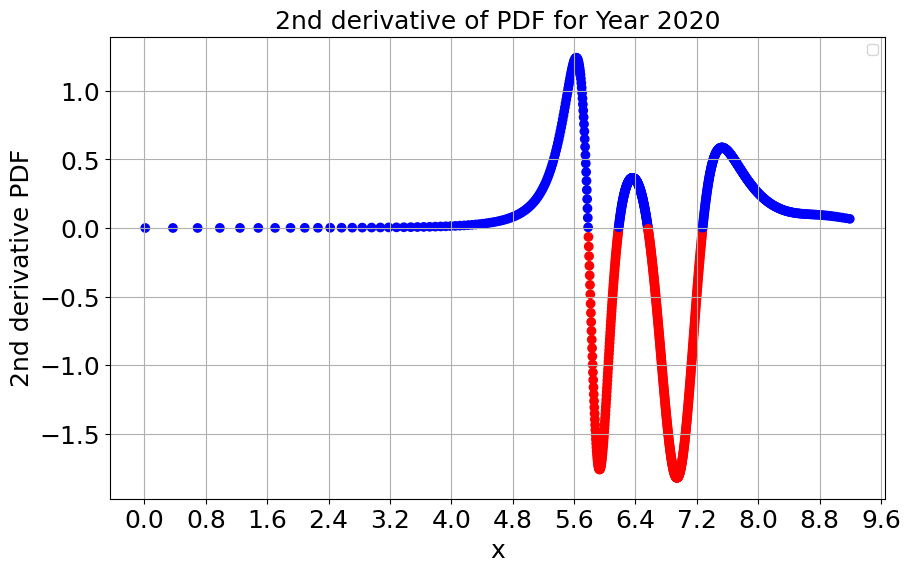

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


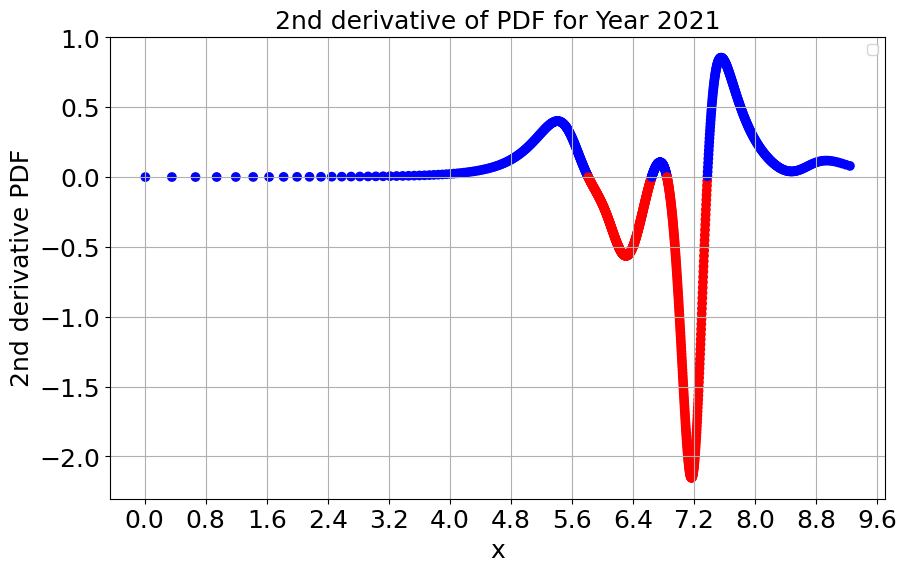

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


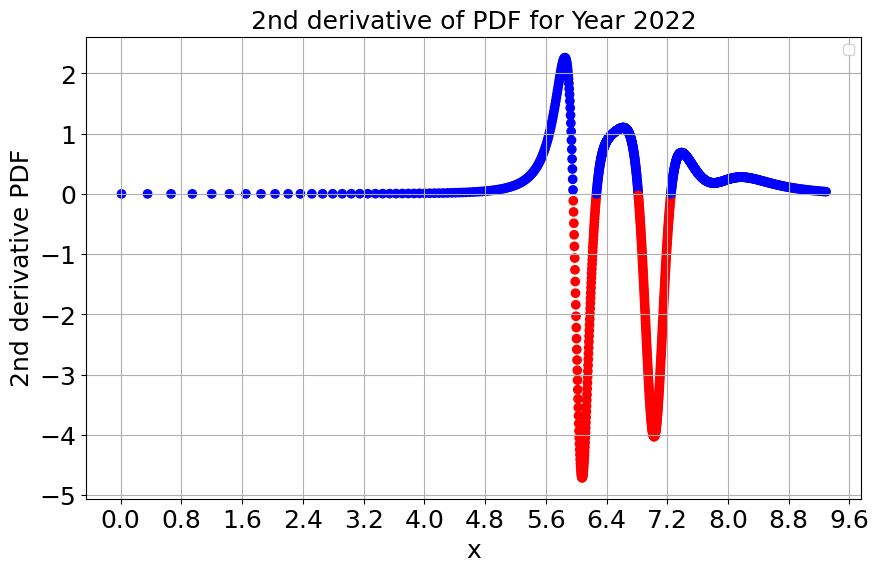

In [17]:
# Define the y values with 1000 points between 0.01 and 0.99
y_values = np.linspace(0.01, 0.99, 1000)

# Plot the quantile functions for each row in params_matrix
for i in range(params_matrix.shape[0]):
    params = params_matrix[i, :]
    quantiles = quantile_metalog(y_values, *params)
    
    #params = np.delete(params,0)
    pdfs = pdf_metalog(y_values, *params)
    
    quantiles_spl = UnivariateSpline(quantiles,pdfs,s=0,k=3)
    quantiles_spl_2d = quantiles_spl.derivative(n=2)
    
    
    # Máscara para identificar valores negativos
    negative_mask = quantiles_spl_2d(quantiles) < 0
    plt.figure(figsize=(10, 6))  # Ajuste os valores (largura, altura) conforme necessário
    plt.scatter(quantiles, quantiles_spl_2d(quantiles),color=np.where(negative_mask, 'red', 'blue'))
    plt.xlabel('x',fontsize=18)
    plt.ylabel('2nd derivative PDF', fontsize=18)
    plt.xticks(np.arange(0, np.max(quantiles)+0.8, 0.8), fontsize=18)
    plt.yticks(fontsize=18)
    plt.title(f'2nd derivative of PDF for Year {i + 2012}', fontsize=18)
    plt.grid()
    plt.legend()

    # Show the plot
    plt.show()

### Original

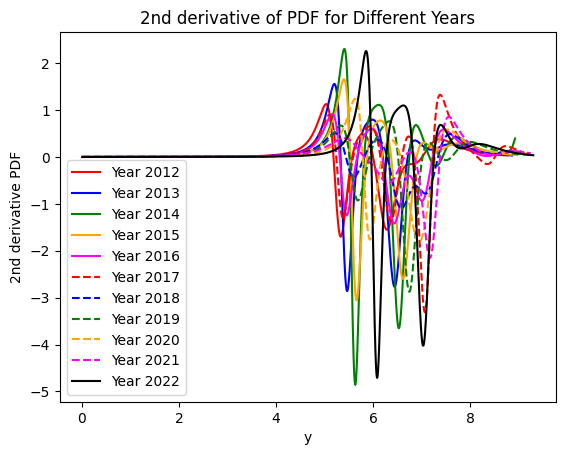

In [13]:
# Define the y values with 1000 points between 0.01 and 0.99
y_values = np.linspace(0.01, 0.99, 1000)

#colors
cores = ['red', 'blue', 'green', 'orange', 'magenta','red', 'blue', 'green', 'orange', 'magenta']


# Create a figure and axis
fig, ax = plt.subplots()

# Plot the quantile functions for each row in params_matrix
for i in range(params_matrix.shape[0]):
    params = params_matrix[i, :]
    quantiles = quantile_metalog(y_values, *params)
    
    #params = np.delete(params,0)
    pdfs = pdf_metalog(y_values, *params)
    
    quantiles_spl = UnivariateSpline(quantiles,pdfs,s=0,k=3)
    quantiles_spl_2d = quantiles_spl.derivative(n=2)
    
    if i < 5:
        ax.plot(quantiles, quantiles_spl_2d(quantiles), label=f'Year {i + 2012}', color=cores[i])
    elif i < 10:
        ax.plot(quantiles, quantiles_spl_2d(quantiles), label=f'Year {i + 2012}', color=cores[i], linestyle='--')
    else:
        ax.plot(quantiles,quantiles_spl_2d(quantiles), label=f'Year {i + 2012}', color='black')
# Add labels and legend
ax.set_xlabel('y')
ax.set_ylabel('2nd derivative PDF')
ax.set_title('2nd derivative of PDF for Different Years')
ax.legend()

# Show the plot
plt.show()

## Finding Class Limits

In [14]:
import scipy as sp
import numpy as np
from scipy.optimize import root

### Classes

In [15]:
# Define the y values with 1000 points between 0.01 and 0.99
y_values = np.linspace(0.01, 0.99, 1000)
percentil_classes_matrix = []
probability_class_limits_matrix = []
guess_matrix =  [ \
                    [5.20, 5.60, 6.00, 6.90], \
                    [5.25, 5.61, 6.40, 6.70], \
                    [5.50, 5.80, 6.35, 6.75, 7.10, 7.40], \
                    [5.50, 5.85, 6.35, 6.90], \
                    [5.25, 5.65, 6.20, 7.25], \
                    [5.25, 5.55, 6.10, 6.45, 6.85, 7.20, 8.10, 8.50], \
                    [5.45, 5.80, 6.30, 7.30], \
                    [5.55, 5.90, 6.50, 7.00, 7.30, 7.60], \
                    [5.75, 6.20, 6.50, 7.25], \
                    [5.80, 6.65, 6.85, 7.30], \
                    [5.95, 6.35, 6.85, 7.25]
                ]

for i in range(params_matrix.shape[0]):
    params = params_matrix[i, :]
    quantiles = quantile_metalog(y_values, *params)
    pdfs = pdf_metalog(y_values, *params)
        
    # Create the spline with s = 0
    quantiles_spl = UnivariateSpline(quantiles, pdfs, s=0, k=3)
    quantiles_spl_2d = quantiles_spl.derivative(n=2)
    
    # Find the roots of the second derivative using the root function
    roots_result = sp.optimize.root(quantiles_spl_2d, x0 = guess_matrix[i] , method='hybr')
    
    # Print the roots
    print(f"Roots ({2012 + i}): {np.round(np.exp(roots_result.x),0)}")
    list_roots =list(roots_result.x)
    percentil_classes_matrix.append(list_roots)
    
    aux_list = [0]
    for root in list_roots:
        prob_interp = np.interp(root ,quantiles,y_values)
        aux_list.append(prob_interp)
    aux_list.append(0.99)
    probability_class_limits_matrix.append(aux_list)
    


Roots (2012): [ 178.  261.  402. 1104.]
Roots (2013): [206. 292. 492. 820.]
Roots (2014): [ 247.  334.  556.  847. 1279. 1679.]
Roots (2015): [250. 354. 582. 985.]
Roots (2016): [ 202.  289.  486. 1368.]
Roots (2017): [ 188.  266.  467.  729.  930. 1377. 3434. 4925.]
Roots (2018): [ 229.  334.  536. 1529.]
Roots (2019): [ 248.  372.  672. 1112. 1615. 2023.]
Roots (2020): [ 325.  483.  708. 1444.]
Roots (2021): [ 334.  768.  938. 1593.]
Roots (2022): [ 387.  527.  914. 1406.]


In [16]:
print(f"Class Limits per year:")
for row in percentil_classes_matrix:
    print(row)

print("--" * 32)

print("Percentil Limits per year:")
for row in probability_class_limits_matrix:
    print(row)

Class Limits per year:
[5.180692132354769, 5.56545318598378, 5.995599719935729, 7.006765825946341]
[5.326347541286585, 5.676070389650851, 6.198714453335518, 6.709472009640585]
[5.510912474656554, 5.812312259713672, 6.321457208746317, 6.74180268815413, 7.153842781725822, 7.426055795845427]
[5.523038458656275, 5.869043179139444, 6.367223959714768, 6.892688024049294]
[5.308401799859853, 5.667320108320618, 6.1861014099042535, 7.221239142039655]
[5.237762246780629, 5.585127254746046, 6.14698385843689, 6.591094797835117, 6.835031751074009, 7.227934517669065, 8.141558456723251, 8.50204044579295]
[5.433956064369687, 5.812323065949448, 6.284427942284461, 7.332427935221675]
[5.512534626690721, 5.919686015853677, 6.509878993613272, 7.013801003515807, 7.387357308910943, 7.612163052335637]
[5.782899365907991, 6.1801970131277635, 6.561986541054991, 7.275250504013249]
[5.812454036304419, 6.643178524860092, 6.843819587716791, 7.373563788523854]
[5.959638471790314, 6.26728949664157, 6.817993117268964, 

In [17]:
contador = 0
for year in probability_class_limits_matrix:
    lista_ano = []
    for i in range(len(year)-1):
        lista_ano.append(round(100*(year[i+1] - year[i]),2))
    print(f'Ano {2012 + contador}: {lista_ano}')
    contador += 1

Ano 2012: [13.22, 10.94, 15.62, 41.05, 18.17]
Ano 2013: [13.62, 10.54, 19.32, 23.82, 31.7]
Ano 2014: [14.78, 10.06, 19.52, 20.25, 14.78, 6.94, 12.66]
Ano 2015: [14.08, 10.82, 18.87, 24.52, 30.7]
Ano 2016: [10.41, 7.95, 16.08, 43.47, 21.08]
Ano 2017: [9.13, 6.78, 15.53, 18.32, 10.74, 16.81, 16.67, 3.02, 2.01]
Ano 2018: [11.89, 8.09, 14.64, 43.4, 20.97]
Ano 2019: [12.37, 9.37, 19.26, 23.35, 13.57, 6.17, 14.91]
Ano 2020: [14.35, 12.5, 15.28, 32.92, 23.95]
Ano 2021: [18.35, 29.03, 8.45, 21.96, 21.21]
Ano 2022: [14.57, 10.16, 21.13, 21.24, 31.89]


## Barras

<Figure size 1200x800 with 0 Axes>

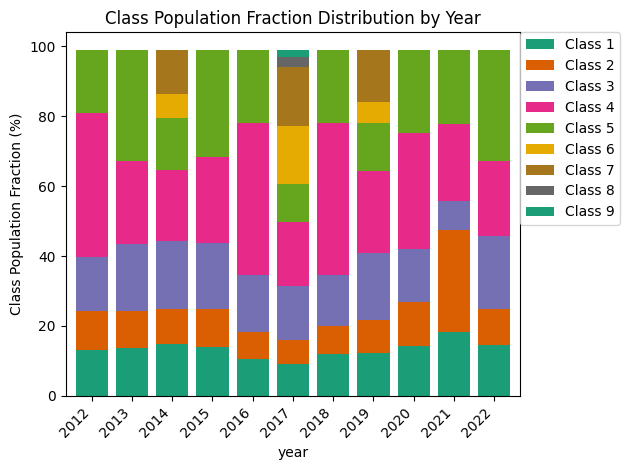

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Dados fornecidos
anos = ['2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']
dados = [
    [13.22, 10.94, 15.62, 41.05, 18.17],
    [13.62, 10.54, 19.32, 23.82, 31.7],
    [14.78, 10.06, 19.52, 20.25, 14.78, 6.94, 12.66],
    [14.08, 10.82, 18.87, 24.52, 30.7],
    [10.41, 7.95, 16.08, 43.47, 21.08],
    [9.13, 6.78, 15.53, 18.32, 10.74, 16.81, 16.67, 3.02, 2.01],
    [11.89, 8.09, 14.64, 43.4, 20.97],
    [12.37, 9.37, 19.26, 23.35, 13.57, 6.17, 14.91],
    [14.35, 12.5, 15.28, 32.92, 23.95],
    [18.35, 29.03, 8.45, 21.96, 21.21],
    [14.57, 10.16, 21.13, 21.24, 31.89]
]

# Criando o DataFrame do Seaborn
df = pd.DataFrame(dados, columns=[f'Class {i+1}' for i in range(max(map(len, dados)))], index=anos)

# Criando o gráfico de barras empilhadas 100%
plt.figure(figsize=(12, 8))
sns.set_palette("Dark2")  # Esquema de cores
ax = df.plot(kind='bar', stacked=True, width=0.8)
plt.title('Class Population Fraction Distribution by Year')
plt.ylabel('Class Population Fraction (%)')
plt.xlabel('year')
plt.xticks(rotation=45, ha='right')

# Ajustando a posição da legenda fora das barras
ax.legend(loc='upper left', bbox_to_anchor=(1, 1), borderaxespad=0.)
plt.tight_layout()

plt.show()


<Figure size 1200x800 with 0 Axes>

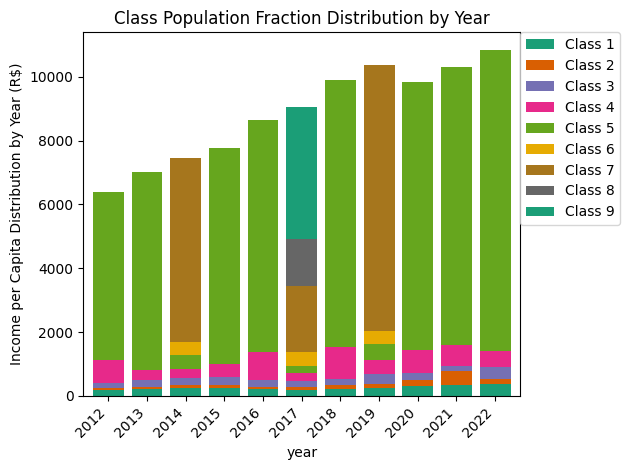

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Dados fornecidos
anos = ['2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']
#dados = [[0, 178.,  261.,  402., 1104.,6384],
#[0, 206., 292., 492., 820.,7021],
#[0, 247.,  334.,  556.,  847., 1279., 1679.,7468],
#[0, 250., 354., 582., 985.,7758],
#[0, 202.,  289.,  486., 1368.,8658],
#[0, 188.,  266.,  467.,  729.,  930., 1377., 3434., 4925.,9049],
#[0, 229.,  334.,  536., 1529.,9893],
#[0, 248.,  372.,  672., 1112., 1615., 2023.,10365],
#[0, 325.,  483.,  708., 1444.,9832],
#[0, 334.,  768.,  938., 1593.,10311],
#[0, 387.,  527.,  914., 1406.,10853]
#]

dados = [[178 , 83 , 141 , 712 , 5280],\
         [206 , 86 , 200 , 328 , 6201],\
         [247 , 87 , 222 , 291 , 432 , 400 , 5789],\
         [250 , 104 , 228 , 403 , 6773],\
         [202 , 87 , 197 , 882 , 7290],\
         [188 , 78 , 201 , 262 , 201, 447, 2057 , 1491 , 4124],\
         [229 , 105 , 202 , 993 , 8364],\
         [248 , 124 , 300 , 440, 503 , 408 , 8342],\
         [325 , 158 , 225 , 736 , 8388],\
         [334 , 434 , 170 , 655 , 8718],\
         [387 , 140 , 387 , 492 , 9447]
]

# Criando o DataFrame do Seaborn
df = pd.DataFrame(dados, columns=[f'Class {i+1}' for i in range(max(map(len, dados)))], index=anos)

# Criando o gráfico de barras empilhadas 100%
plt.figure(figsize=(12, 8))
sns.set_palette("Dark2")  # Esquema de cores
ax = df.plot(kind='bar', stacked=True, width=0.8)
plt.title('Class Population Fraction Distribution by Year')
plt.ylabel('Income per Capita Distribution by Year (R$)')
plt.xlabel('year')
plt.xticks(rotation=45, ha='right')

# Ajustando a posição da legenda fora das barras
ax.legend(loc='upper left', bbox_to_anchor=(1, 1), borderaxespad=0.)
plt.tight_layout()

plt.show()


<Figure size 1200x800 with 0 Axes>

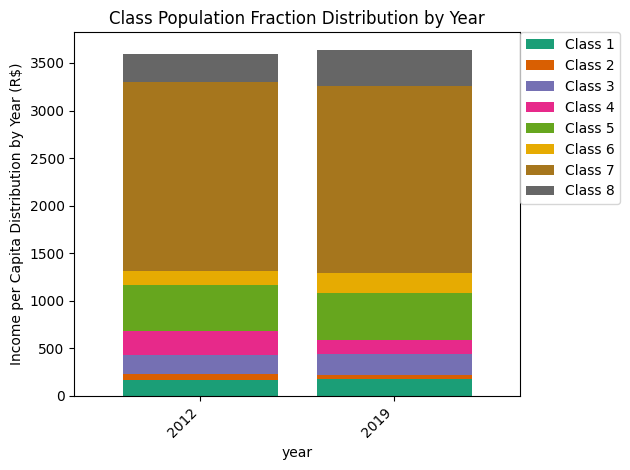

In [30]:
dados = [[172,63,198,245,486,154,1979,301],#,115211],
        [178,37,222,147,502,201,1975,378]]#,115069]]
anos = ['2012', '2019']


# Criando o DataFrame do Seaborn
df = pd.DataFrame(dados, columns=[f'Class {i+1}' for i in range(max(map(len, dados)))], index=anos)

# Criando o gráfico de barras empilhadas 100%
plt.figure(figsize=(12, 8))
sns.set_palette("Dark2")  # Esquema de cores
ax = df.plot(kind='bar', stacked=True, width=0.8)
plt.title('Class Population Fraction Distribution by Year')
plt.ylabel('Income per Capita Distribution by Year (R$)')
plt.xlabel('year')
plt.xticks(rotation=45, ha='right')

# Ajustando a posição da legenda fora das barras
ax.legend(loc='upper left', bbox_to_anchor=(1, 1), borderaxespad=0.)
plt.tight_layout()

plt.show()